# 🛍️ Mall Customer Segmentation with KMeans
This notebook demonstrates the complete clustering pipeline without external module imports.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## Load and Preview Data

In [3]:
# Load dataset
df = pd.read_csv("../data/raw/mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,103.359000,39.053000,61.630000,50.83700
std,57.676813,13.621517,26.020033,26.06649
min,1.000000,18.000000,15.000000,1.00000
25%,53.000000,29.000000,43.000000,35.00000
50%,105.500000,36.000000,62.000000,50.00000
75%,152.000000,49.000000,78.000000,73.00000
max,200.000000,70.000000,137.000000,99.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1000 non-null   int64 
 1   Gender                  1000 non-null   object
 2   Age                     1000 non-null   int64 
 3   Annual Income (k$)      1000 non-null   int64 
 4   Spending Score (1-100)  1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


C:\Users\Amit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Amit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Amit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Amit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

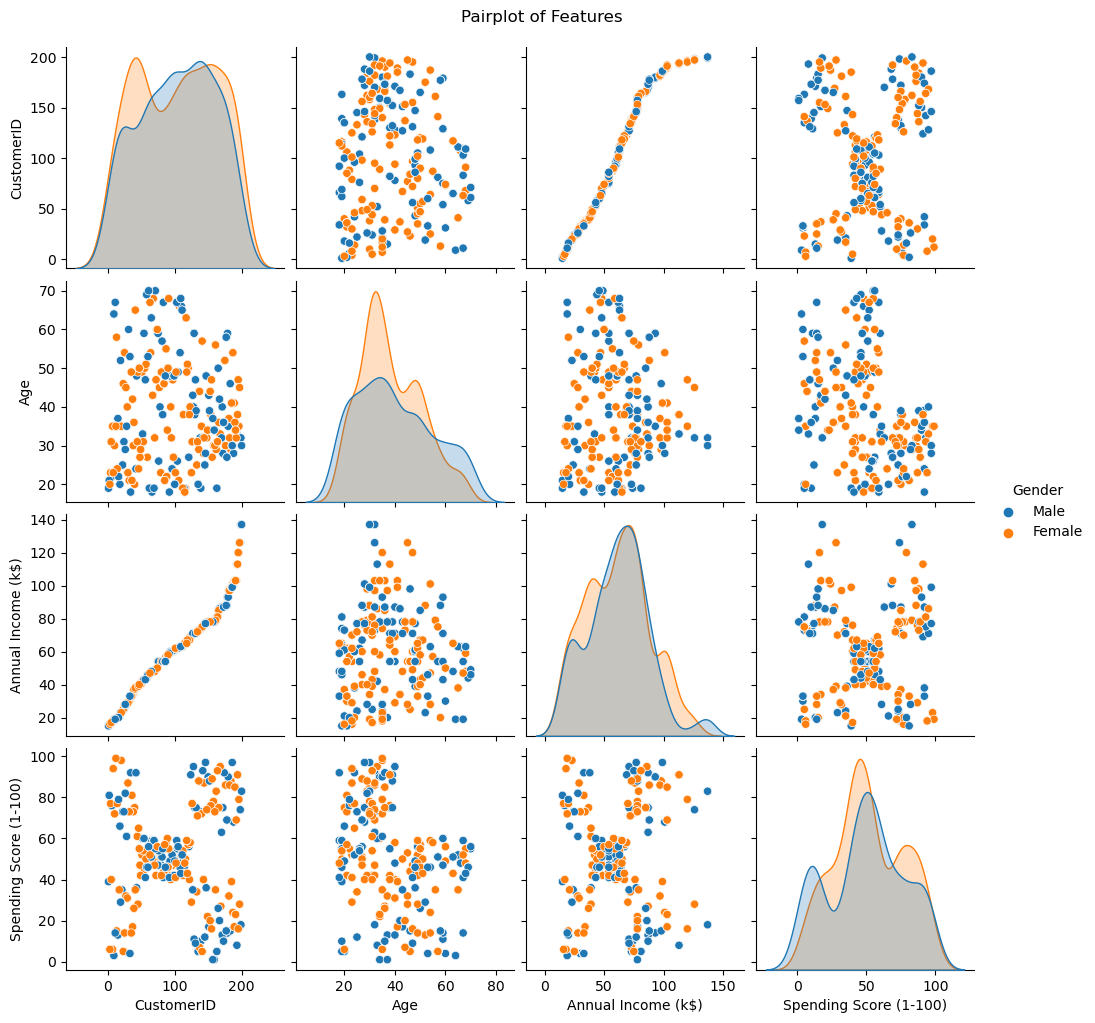

In [6]:
sns.pairplot(df, hue='Gender')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

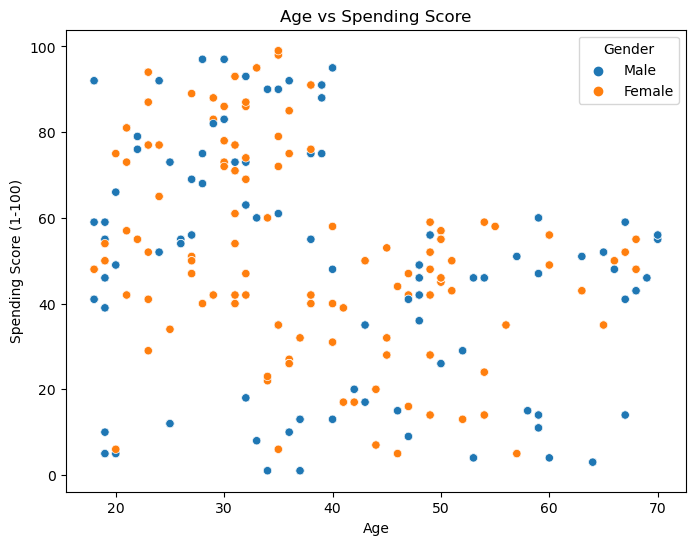

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Gender")
plt.title("Age vs Spending Score")
plt.show()

## Feature Selection

In [8]:
# Placeholder for actual feature selection
# In this example, we keep all features except ID
df = df.copy()  # deep copy
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##  Data Preprocessing

In [9]:
df = df.drop(columns=["CustomerID"])
df = pd.get_dummies(df, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
print("Scaled shape:", X_scaled.shape)

Scaled shape: (1000, 4)


## Model Training

In [10]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(X_scaled)
score = silhouette_score(X_scaled, model.labels_)
print(f"Silhouette Score: {score:.4f}")

C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.3302


## Assign Cluster Labels

In [11]:
df['Cluster'] = model.labels_
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
0,19,15,39,True,1
1,21,15,81,True,1
2,20,16,6,False,0
3,23,16,77,False,4
4,31,17,40,False,0


## PCA Visualization

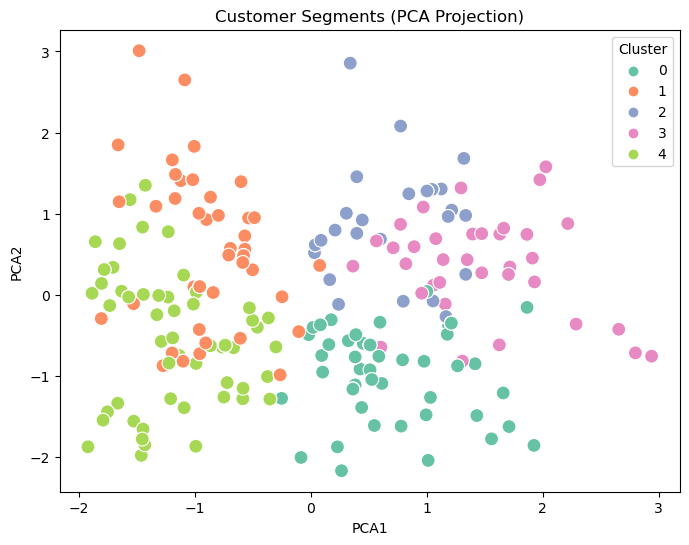

In [12]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = components[:, 0], components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=100)
plt.title("Customer Segments (PCA Projection)")
plt.show()

## Save Model and Scaler

In [ ]:
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/kmeans_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
print("Model and Scaler saved!")